### 🔹 Support Vector Regression (SVR)  

Support Vector Regression (SVR) is a powerful regression technique based on the principles of **Support Vector Machines (SVMs)**.  
Unlike simple linear models, SVR tries to fit the best line (or curve) within a certain **margin of tolerance** (called epsilon), allowing for more robust predictions in noisy datasets.  

The main idea of SVR:  
- Instead of minimizing the error for each data point, SVR focuses on keeping the errors **within a defined margin (ε-insensitive zone)**.  
- Data points outside this margin are called **support vectors**, and they determine the final regression model.  

The mathematical representation can be written as:  

$$
f(x) = w^T \phi(x) + b
$$  

where: 
- $w$ are the model weights,
- $\phi$ is a transformation function (can map input to higher dimensions), 
- $b$ is the intercept.  

SVR helps us to:  
- Handle both **linear and non-linear** regression problems.  
- Achieve better generalization in noisy datasets.  
- Leverage kernel functions (linear, polynomial, RBF, etc.) to capture complex relationships.  

In this notebook, we will implement **Support Vector Regression** and explore how different kernels affect model performance 🚀.  


# --------------------------------------------------------------------------

# import dataset

In [1]:
# from google.colab import files, drive

# up = files.upload()
# drive.mount('/content/drive')

In [2]:
import pandas as pd

df = pd.read_csv('dataset.csv')
df.head(3)

,A,B,C,T
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136


In [3]:
df = df[['A', 'T']]
df.head(3)

,A,T
0,2.0,196
1,2.4,221
2,1.5,136


# cleaning

In [4]:
# clean the data

# encoding

In [5]:
# encode the data

# define x , y

In [6]:
# x and y must be define as 2D

In [7]:
import numpy as np

x = np.array(df[['A']])   # 2D
y = np.array(df[['T']])   # 2D

# train test split

In [28]:
# # finding best random state 

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# sc_x = StandardScaler()
# sc_y = StandardScaler()
# from sklearn.svm import SVR
# svr = SVR()
# from sklearn.metrics import r2_score

# import time
# t1 = time.time()
# lst = []
# for i in range(1,10):
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
#     x_train = sc_x.fit_transform(x_train)
#     x_test = sc_x.transform(x_test)
#     y_train = sc_y.fit_transform(y_train)
#     y_test = sc_y.transform(y_test)
#     y_train = np.ravel(y_train)
#     y_test = np.ravel(y_test)
#     svr.fit(x_train, y_train)
#     yhat_test = svr.predict(x_test)
#     r2 = r2_score(y_test, yhat_test)
#     lst.append(r2)
# t2 = time.time()
# print(f"run time: {round((t2 - t1) / 60 , 0)} min")
# print(f"r2_score: {round(max(lst), 2)}")
# rs = np.argmax(lst) + 1
# print(f"random_state: {rs}")

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [10]:
x[:5]

array([[2. ],
       [2.4],
       [1.5],
       [3.5],
       [3.5]])

In [11]:
y_train[:5]

array([[258],
       [212],
       [317],
       [308],
       [301]])

# feature scaling

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sc_x = StandardScaler().fit(x_train)
sc_y = StandardScaler().fit(y_train)

In [13]:
x_train = sc_x.transform(x_train)
x_test = sc_x.transform(x_test)

y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [14]:
y_train[:5]

array([ 0.02336012, -0.70701586,  0.96014671,  0.81724706,  0.70610289])

# fit train data

In [15]:
# # K-fold cross validation

# from sklearn.svm import SVR
# from sklearn.model_selection import GridSearchCV

# parameters = {
#     '': [],
#     '': []
# }

# sv = SVR()
# gs = GridSearchCV(estimator=sv, param_grid=parameters, cv=5)

# gs.fit(x_train, y_train)

# best_params = gs.best_params_
# print(best_params)

In [16]:
# def param
# kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0
# epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1

In [17]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(x_train, y_train)

SVR()

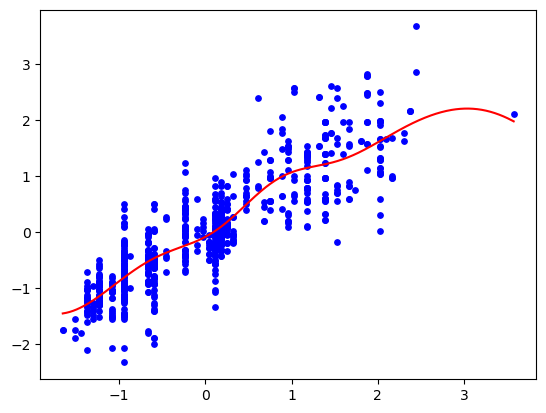

In [18]:
import matplotlib.pyplot as plt

plt.scatter(x_train, y_train, color='b', s=15)
xx = np.arange(np.min(x_train), np.max(x_train), 0.01).reshape(-1, 1)
plt.plot(xx, svr.predict(xx), color='r')
plt.show()

# predict test data

In [19]:
yhat_test = svr.predict(x_test)

In [20]:
yhat_test[:5]

array([ 1.04715456,  0.02256772,  0.10044186, -0.24290104, -0.81385553])

# evaluating the model

In [21]:
from sklearn.metrics import r2_score

print("r2-score (train data): %0.4f" % r2_score(y_train, svr.predict(x_train)))
print("r2-score (test data): %0.4f" % r2_score(y_test, yhat_test))

r2-score (train data): 0.7706
r2-score (test data): 0.7757


In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(f"MSE (train data): {mean_squared_error(y_train, svr.predict(x_train))}")
print(f"MAE (train data): {mean_absolute_error(y_train, svr.predict(x_train))}")
print(f"MSE (test data): {mean_squared_error(y_test, yhat_test)}")
print(f"MAE (test data): {mean_absolute_error(y_test, yhat_test)}")

MSE (train data): 0.22937182968223632
MAE (train data): 0.36253405954006285
MSE (test data): 0.23454665529487734
MAE (test data): 0.37469159511941635


# predict new data

In [23]:
sc_y.inverse_transform(svr.predict(sc_x.transform([[5.5]])).reshape(-1, 1))

array([[336.4709594]])

# save the model

In [24]:
# import joblib

# joblib.dump(svr, 'svr_model.pkl')

# load the model

In [25]:
# import joblib

# svr = joblib.load('svr_model.pkl')